<a href="https://colab.research.google.com/github/gayecolakoglu/Malaria_Detection_Deep_Learning/blob/main/CLAHE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os 
import cv2
import glob
import imageio
import numpy as np
from tqdm import tqdm
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
import pathlib
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [3]:
# Packages used
import os
import glob
import shutil
import random
import pandas as pd
from PIL import Image
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

In [4]:
import os
import sys
import random
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label

from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from tensorflow.keras.layers import concatenate

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

import tensorflow as tf
from keras.preprocessing import image

In [5]:
import cv2
import os

In [6]:
#install kaggle API and make a directory called kaggle
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

#import the API key into colab
from google.colab import files
files.upload()

#copy the API key to the kaggle directory we created
!cp kaggle.json ~/.kaggle/

#list the datasets with this code
!kaggle datasets list

#download files now by using this sample code
!kaggle datasets download -diarunava/cell-images-for-detecting-malaria
!ls

Saving kaggle.json to kaggle.json
ref                                                             title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ahsan81/hotel-reservations-classification-dataset               Hotel Reservations Dataset                   480KB  2023-01-04 12:50:31            593         24  1.0              
thedevastator/global-fossil-co2-emissions-by-country-2002-2022  Emissions by Country, 2002-2022              621KB  2023-01-02 20:10:36            548         24  1.0              
ebrahimelgazar/new-york-city-airbnb-market                      New York City Airbnb Market                    1MB  2023-01-03 13:41:12            408         23  1.0              
die9origephit/fifa-world-cup-2022-complete-dataset           

In [7]:
import zipfile

zip_ref = zipfile.ZipFile("/content/cell-images-for-detecting-malaria.zip", 'r')
zip_ref.extractall("/content/gdrive/MyDrive/Colab Notebooks/ML")
zip_ref.close()

In [8]:
data_dir = "/content/gdrive/MyDrive/Colab Notebooks/ML/cell_images/"
data_dir = pathlib.Path(data_dir)

parasited_count = len(list(data_dir.glob('Parasitized/*.png')))
print("Parasited:",parasited_count)

uninfected_count = len(list(data_dir.glob('Uninfected/*.png')))
print("Uninfected:",uninfected_count)

Parasited: 13779
Uninfected: 13779


In [9]:
#this directory contains same data, we can delete it
import shutil

shutil.rmtree('/content/gdrive/MyDrive/Colab Notebooks/ML/cell_images/cell_images')

In [11]:
folders=["/content/gdrive/MyDrive/Colab Notebooks/ML/cell_images/Parasitized/","/content/gdrive/MyDrive/Colab Notebooks/ML/cell_images/Uninfected/"]


for folder in folders:  
  for filename in os.listdir(folder):
      print(filename)
      img = cv2.imread(os.path.join(folder,filename))
      try:
        img = cv2.resize(img,(224,224),3) # resize
        print(img.shape)
      except:
        break
      height, width , layers = img.shape
      size=(width,height)
      print(size)
      lab_image = cv2.cvtColor(img,cv2.COLOR_BGR2LAB)
      l,a,b = cv2.split(lab_image)
      equ = cv2.equalizeHist(l)
      updated_lab_img = cv2.merge((equ,a,b))
      hist_eq_img = cv2.cvtColor(updated_lab_img,cv2.COLOR_LAB2BGR)
      ###########CLAHE#########################
      #Apply CLAHE to L channel
      clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
      clahe_img = clahe.apply(l)
      #plt.hist(clahe_img.flat, bins=100, range=(0,255))

      #Combine the CLAHE enhanced L-channel back with A and B channels
      updated_lab_img2 = cv2.merge((clahe_img,a,b))

      #Convert LAB image back to color (RGB)
      CLAHE_img = cv2.cvtColor(updated_lab_img2, cv2.COLOR_LAB2BGR)
      if folder=="/content/gdrive/MyDrive/Colab Notebooks/ML/cell_images/Uninfected/":
        cv2.imwrite('/content/gdrive/MyDrive/Colab Notebooks/ML/CLAHE/Uninfected/'+filename,CLAHE_img)
      elif folder=="/content/gdrive/MyDrive/Colab Notebooks/ML/cell_images/Parasitized/":
        cv2.imwrite('/content/gdrive/MyDrive/Colab Notebooks/ML/CLAHE/Parasitized/'+filename,CLAHE_img)
      else:
        print("wrong folder")


Görüntülenen çıkış son 5000 satıra kısaltıldı.
(224, 224)
C76P37ThinF_IMG_20150815_172808_cell_148.png
(224, 224, 3)
(224, 224)
C76P37ThinF_IMG_20150815_172808_cell_15.png
(224, 224, 3)
(224, 224)
C76P37ThinF_IMG_20150815_172808_cell_155.png
(224, 224, 3)
(224, 224)
C76P37ThinF_IMG_20150815_172808_cell_170.png
(224, 224, 3)
(224, 224)
C76P37ThinF_IMG_20150815_172808_cell_172.png
(224, 224, 3)
(224, 224)
C76P37ThinF_IMG_20150815_172808_cell_186.png
(224, 224, 3)
(224, 224)
C76P37ThinF_IMG_20150815_172808_cell_19.png
(224, 224, 3)
(224, 224)
C76P37ThinF_IMG_20150815_172808_cell_195.png
(224, 224, 3)
(224, 224)
C76P37ThinF_IMG_20150815_172808_cell_52.png
(224, 224, 3)
(224, 224)
C76P37ThinF_IMG_20150815_172808_cell_73.png
(224, 224, 3)
(224, 224)
C76P37ThinF_IMG_20150815_172902_cell_109.png
(224, 224, 3)
(224, 224)
C76P37ThinF_IMG_20150815_172902_cell_115.png
(224, 224, 3)
(224, 224)
C76P37ThinF_IMG_20150815_172902_cell_135.png
(224, 224, 3)
(224, 224)
C76P37ThinF_IMG_20150815_172902_cell

In [12]:
data_dir = "/content/gdrive/MyDrive/Colab Notebooks/ML/cell_images/"
data_dir = pathlib.Path(data_dir)

parasited_count = len(list(data_dir.glob('Parasitized/*.png')))
print("Parasited:",parasited_count)

uninfected_count = len(list(data_dir.glob('Uninfected/*.png')))
print("Uninfected:",uninfected_count)

Parasited: 13779
Uninfected: 13779


13779


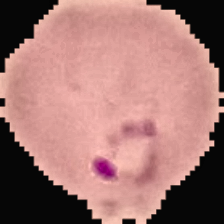

In [14]:
import PIL
data_dir = "/content/gdrive/MyDrive/Colab Notebooks/ML/CLAHE/"
data_dir = pathlib.Path(data_dir)

image_count = len(list(data_dir.glob('Parasitized/*.png')))
print(image_count)
PIL.Image.open(str(list(data_dir.glob('Parasitized/*.png'))[6]))


13779


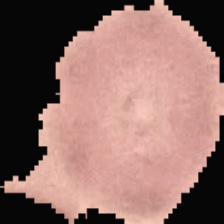

In [15]:
image_count = len(list(data_dir.glob('Uninfected/*.png')))
print(image_count)
PIL.Image.open(str(list(data_dir.glob('Uninfected/*.png'))[6]))